# Behavioural analysis

## Preparing the data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [10]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-tXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
ds = pd.DataFrame()
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
for subjDir in allSubjDirs:
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    ds = ds.append(pd.read_csv(subjFilePath))
print ds.shape
print ds.columns

(648, 45)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'szRelL', u'szRelR',
       u'offX', u'offY', u'tOffL', u'tOffR', u'trialT', u'nFrames', u'nNa',
       u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090', u'pd180',
       u'pd270', u'qnResp', u'ringSz'],
      dtype='object')


Transforming the data set first.

In [11]:
# dealing with the incompatibility of the first data set's sizes:
#ds.ix[ds.trialT==1,'ringSz'] = ds.ix[ds.trialT==1,'ringSz'] * 192 / 258
#ds.ix[ds.ringSz==258,'ringSz'] = 192
# converting sizes to deg:
ds['stimSz'] = np.round((ds.periGap*2+32)/35,1)
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
ds['ringSzP'] = np.round(ds.ringSzDeg/ds.stimSz,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

         expName             time  participant  session  trialN  dirL  dirR  \
0  mcEcc_ct-tXbv  2017-02-22_1636           11      NaN       1     0     0   
1  mcEcc_ct-tXbv  2017-02-22_1636           11      NaN       2     0     0   
2  mcEcc_ct-tXbv  2017-02-22_1636           11      NaN       3     0     0   
3  mcEcc_ct-tXbv  2017-02-22_1636           11      NaN       4     0     0   
4  mcEcc_ct-tXbv  2017-02-22_1636           11      NaN       5     0     0   

   vL  vR  szL   ...    nf270  pd000  pd090  pd180     pd270  qnResp  ringSz  \
0   0   0  256   ...        1    0.0    0.0    0.0  0.025253       0     192   
1   0   0  256   ...        1    0.0    0.0    0.0  0.016667       0     192   
2   0   0  256   ...        1    0.0    0.0    0.0  0.025253       0     192   
3   0   0  256   ...        1    0.0    0.0    0.0  0.010040       0     192   
4   0   0  256   ...        1    0.0    0.0    0.0  0.050505       0     192   

   stimSz  ringSzDeg ringSzP  
0     6.4    

## Visualization

In [12]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            1   87  0.906250  0.293011    96
1            9   31  0.430556  0.498629    72
2           11   76  0.791667  0.408248    96
3           13   42  0.437500  0.498682    96
4           14   32  0.333333  0.473879    96
5           19   66  0.687500  0.465946    96
6           20   27  0.281250  0.451969    96
Fast (left):
   participant  sum      mean       std  size
0            1    4  0.041667  0.200875    96
1            9   39  0.541667  0.501757    72
2           11    9  0.093750  0.293011    96
3           13   19  0.197917  0.400520    96
4           14   18  0.187500  0.392361    96
5           19    7  0.072917  0.261365    96
6           20    5  0.052083  0.223361    96
Patchy/transparent (up):
   participant  sum      mean       std  size
0            1    1  0.010417  0.102062    96
1            9    2  0.027778  0.165489    72
2           11   10  0.104167  0.307080    96
3           13   31  0.322917

In [13]:
ssRing = ds[ds.ringSzP < 1]

### Proportion slow/fast/patchy trials

(-0.1, 1.1)

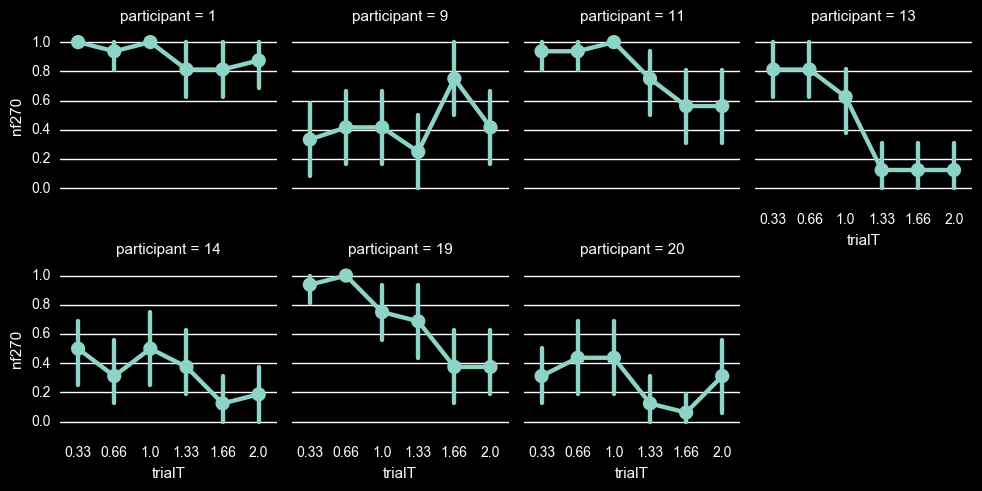

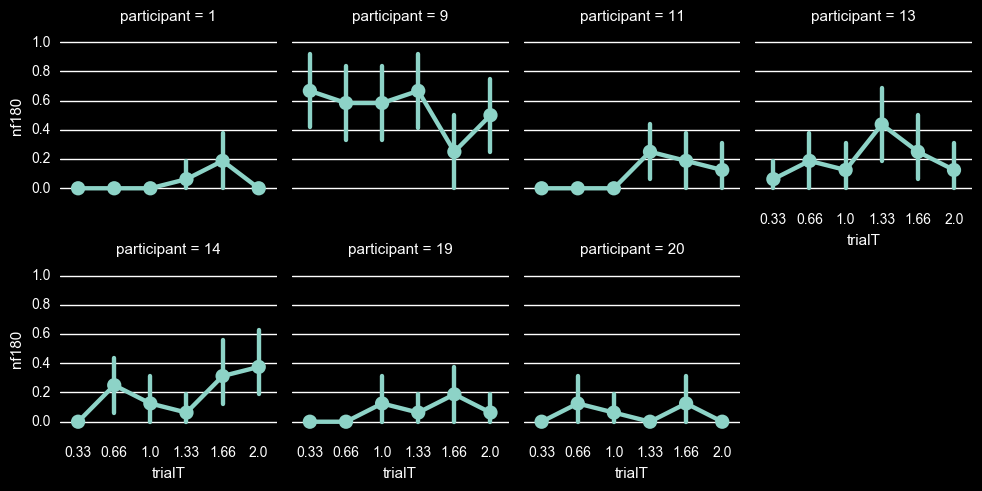

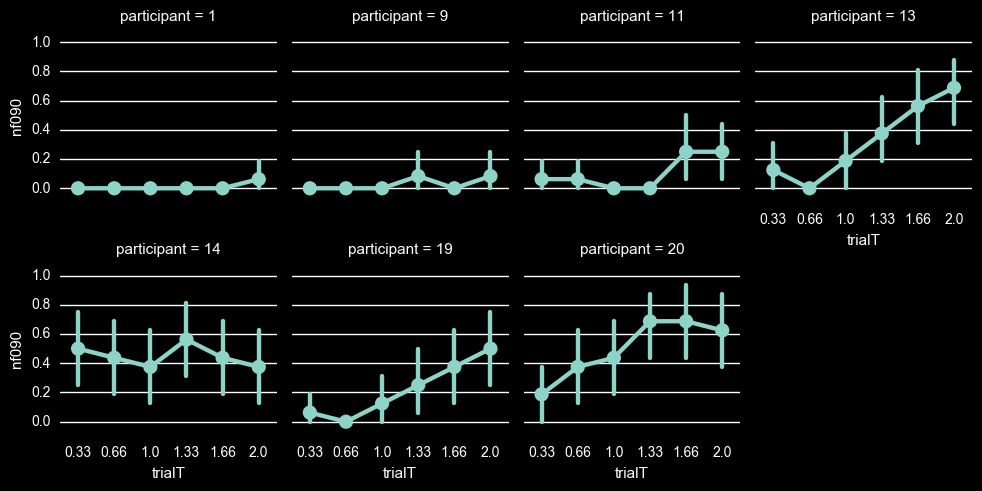

In [14]:
g = sns.factorplot(x='trialT', y='nf270', col='participant', col_wrap=4,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf180', col='participant', col_wrap=4,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf090', col='participant', col_wrap=4,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

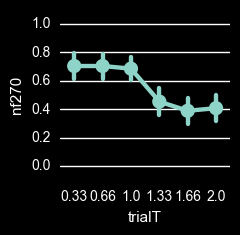

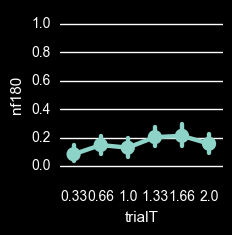

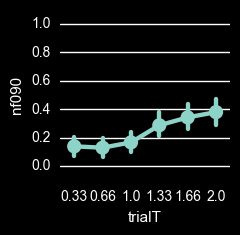

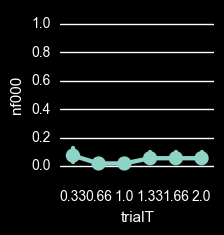

In [15]:
g = sns.factorplot(x='trialT', y='nf270', data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf180', data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf090', data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf000', data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

### Stimulus size for slow/fast/patchy trials

(-0.1, 1.1)

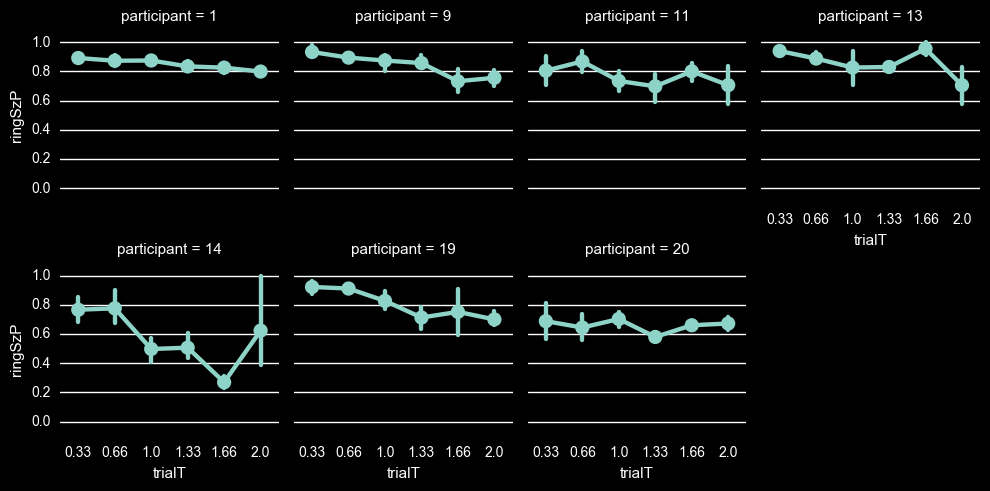

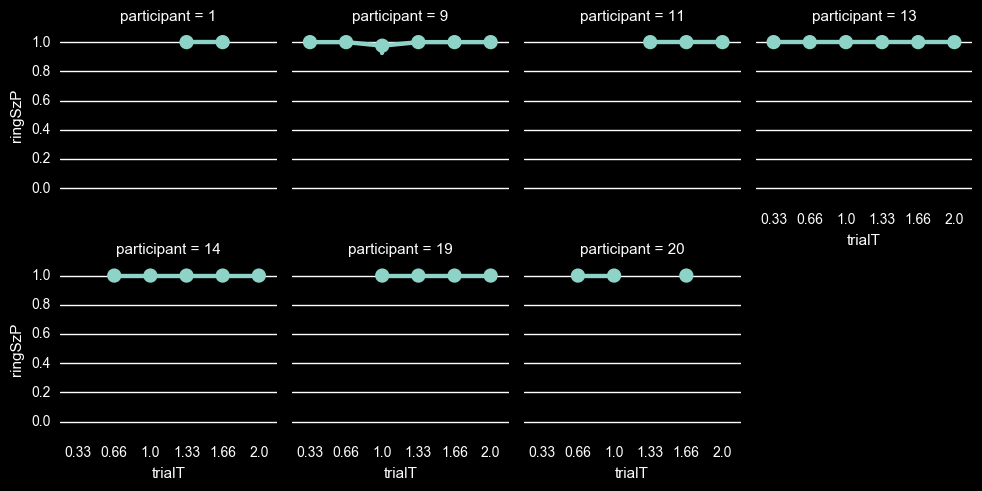

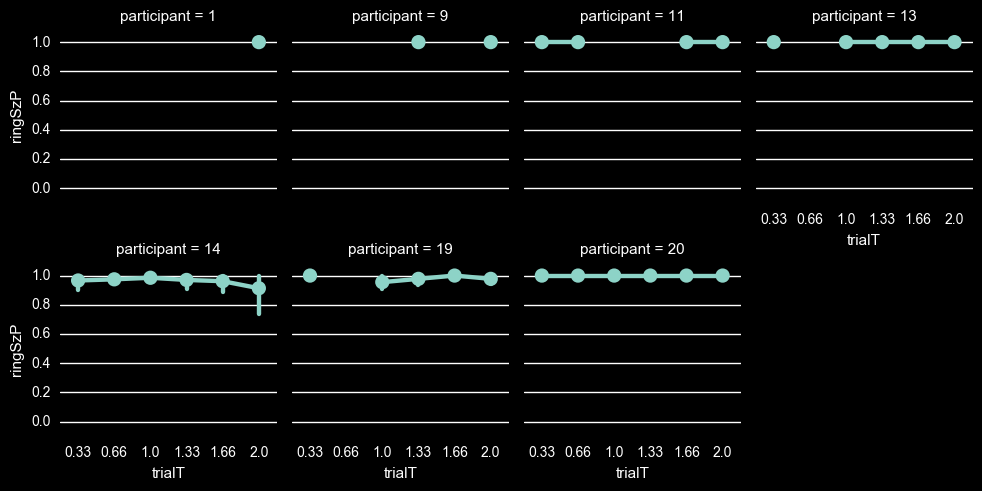

In [16]:
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=4,
                   data=ds[ds.nf270==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=4,
                   data=ds[ds.nf180==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=4,
                   data=ds[ds.nf090==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)